In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [51]:
def preprocessing(df, old_name, new_name):
    '''
    Preprocesses data for a location
    '''
    df = df.sort_values(by='created_at',ascending=True)
    df = df.set_index('created_at')
    hourly_df = df.resample('H').mean()
    hourly_df.dropna(inplace=True)
    hourly_df = hourly_df.rename(columns={old_name:new_name})
    return hourly_df

In [52]:
def merge_dfs(df_list):
    '''
    Merges several dataframes into one based on the index
    '''
    from functools import reduce
    final_df = reduce(lambda left,right: pd.merge(left,right,on='created_at'), df_list)
    return final_df

In [53]:
def correlation_matrix(df):
    '''
    Generates correlation matrix
    '''
    return df.corr()

In [54]:
def heat_map(df, title):
    import seaborn as sns
    
    plt.figure(figsize=(9,9))
    plt.title(title)
    sns.heatmap(df, cmap='OrRd', linewidth=1)
    plt.savefig('urban_background_correlation.png')
    plt.show()

In [55]:
background_data = pd.read_csv('./background vs local/stats_table_urban_background_30_09_2020.csv')
background_data.head()

,Parish,Latitude,Longitude,Minimum,Maximum,Mean PM 2.5,Median PM 2.5,25th Percentile,75th Percentile
0,Nakasero II(2),0.322320,32.575700,0.0,134.3,29.0,28.5,12.8,40.8
1,Kansanga,0.298750,32.615000,0.0,121.1,25.8,23.1,10.3,37.5
2,Nansana East,0.375900,32.528000,0.0,187.9,45.1,40.4,24.7,58.0
3,Lubaga,0.295314,32.553682,0.0,127.0,33.4,32.5,17.9,44.7
4,Nansana West,0.363000,32.529000,4.8,156.3,40.6,38.4,26.8,49.1


In [56]:
import os
background_df_list = []
for parish in background_data.Parish:
    for f in os.listdir('background vs local/'):
        if parish+'.csv' in f:
            filepath = 'background vs local/'+f
    location_df = pd.read_csv(filepath, usecols = ['created_at', 'urban_background'], parse_dates =['created_at'])
    preprocessed_df = preprocessing(location_df, 'urban_background', parish.lower().replace(' ', '_'))
    background_df_list.append(preprocessed_df)
    print(parish, ':done')

Nakasero II(2) :done
Kansanga :done
Nansana East :done
Lubaga :done
Nansana West :done
Lukuli(2) :done
Bugolobi :done
Kyaliwajjala :done
Seguku :done
Kiwafu :done
Kiwatule :done
Civic Centre :done
Makindye I :done


In [57]:
background_df_list[5].head()

,lukuli(2)
created_at,
2020-02-14 00:00:00+00:00,40.818605
2020-02-14 01:00:00+00:00,33.403864
2020-02-14 02:00:00+00:00,29.184634
2020-02-14 03:00:00+00:00,28.668571
2020-02-14 04:00:00+00:00,30.668864


In [58]:
background_merged_df = merge_dfs(background_df_list)
background_merged_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
created_at,,,,,,,,,,,,,
2020-02-14 00:00:00+00:00,40.546977,46.820455,78.222093,41.763953,68.173171,40.818605,50.206279,57.501667,45.684419,61.354048,45.842791,39.434545,43.548837
2020-02-14 01:00:00+00:00,35.402195,35.191951,74.776190,39.672195,61.520250,33.403864,40.587209,45.246279,40.899773,56.093750,35.498140,32.508605,40.053953
2020-02-14 02:00:00+00:00,34.210465,31.319091,67.130714,42.015610,61.962326,29.184634,34.446591,41.216585,40.546512,52.009722,30.473256,30.993514,38.244390
2020-02-14 03:00:00+00:00,31.672439,32.155814,71.137000,51.462326,72.762326,28.668571,32.278409,43.518537,42.905349,48.253333,31.302558,32.384324,33.863409
2020-02-14 04:00:00+00:00,31.380976,35.178372,86.985000,51.929024,70.987907,30.668864,30.506364,44.241905,42.643256,48.503750,39.681395,32.768182,33.655581


In [59]:
background_merged_df.shape

(2753, 13)

In [60]:
background_corr_df = correlation_matrix(background_merged_df)
background_corr_df

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
nakasero_ii(2),1.000000,0.881598,0.801243,0.873577,0.279530,0.887410,0.911226,0.875297,0.873869,0.781240,0.869404,0.931575,0.848532
kansanga,0.881598,1.000000,0.684756,0.819480,0.094616,0.882021,0.917095,0.849451,0.844200,0.812192,0.907662,0.842130,0.792057
nansana_east,0.801243,0.684756,1.000000,0.758331,0.468590,0.822631,0.803960,0.815275,0.715723,0.627625,0.714155,0.831312,0.807693
lubaga,0.873577,0.819480,0.758331,1.000000,0.300564,0.828837,0.816612,0.793608,0.862289,0.772932,0.801356,0.851695,0.777813
nansana_west,0.279530,0.094616,0.468590,0.300564,1.000000,0.281166,0.227811,0.266043,0.235263,0.022333,0.045667,0.342862,0.394871
lukuli(2),0.887410,0.882021,0.822631,0.828837,0.281166,1.000000,0.927282,0.875976,0.821590,0.757667,0.842675,0.910179,0.928686
bugolobi,0.911226,0.917095,0.803960,0.816612,0.227811,0.927282,1.000000,0.908996,0.831476,0.764998,0.887378,0.933271,0.865875
kyaliwajjala,0.875297,0.849451,0.815275,0.793608,0.266043,0.875976,0.908996,1.000000,0.787443,0.720755,0.874423,0.876044,0.827240
seguku,0.873869,0.844200,0.715723,0.862289,0.235263,0.821590,0.831476,0.787443,1.000000,0.805245,0.827255,0.841362,0.761739
kiwafu,0.781240,0.812192,0.627625,0.772932,0.022333,0.757667,0.764998,0.720755,0.805245,1.000000,0.798115,0.732431,0.667099


In [61]:
rounded_df =background_corr_df.round(decimals=3)
rounded_df.to_csv('urban_background_pairwise_correlation.csv')
rounded_df

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
nakasero_ii(2),1.000,0.882,0.801,0.874,0.280,0.887,0.911,0.875,0.874,0.781,0.869,0.932,0.849
kansanga,0.882,1.000,0.685,0.819,0.095,0.882,0.917,0.849,0.844,0.812,0.908,0.842,0.792
nansana_east,0.801,0.685,1.000,0.758,0.469,0.823,0.804,0.815,0.716,0.628,0.714,0.831,0.808
lubaga,0.874,0.819,0.758,1.000,0.301,0.829,0.817,0.794,0.862,0.773,0.801,0.852,0.778
nansana_west,0.280,0.095,0.469,0.301,1.000,0.281,0.228,0.266,0.235,0.022,0.046,0.343,0.395
lukuli(2),0.887,0.882,0.823,0.829,0.281,1.000,0.927,0.876,0.822,0.758,0.843,0.910,0.929
bugolobi,0.911,0.917,0.804,0.817,0.228,0.927,1.000,0.909,0.831,0.765,0.887,0.933,0.866
kyaliwajjala,0.875,0.849,0.815,0.794,0.266,0.876,0.909,1.000,0.787,0.721,0.874,0.876,0.827
seguku,0.874,0.844,0.716,0.862,0.235,0.822,0.831,0.787,1.000,0.805,0.827,0.841,0.762
kiwafu,0.781,0.812,0.628,0.773,0.022,0.758,0.765,0.721,0.805,1.000,0.798,0.732,0.667


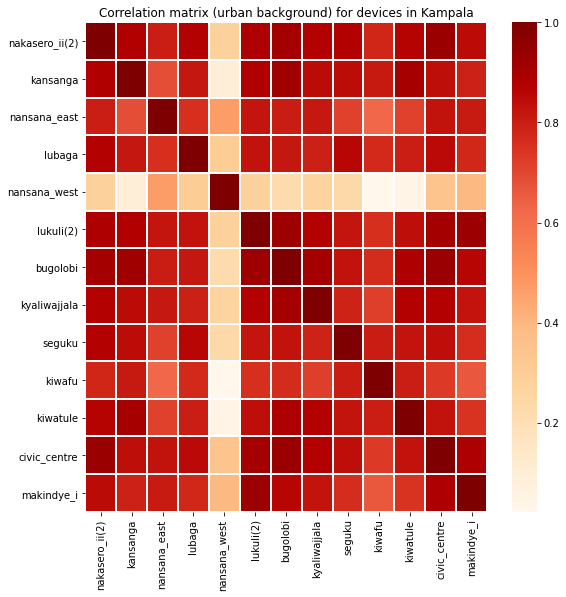

In [62]:
heat_map(rounded_df, 'Correlation matrix (urban background) for devices in Kampala')

In [63]:
background_merged_df.to_csv('urban_background_merged_data.csv', index=False)

In [64]:
background_merged_df.head()

,nakasero_ii(2),kansanga,nansana_east,lubaga,nansana_west,lukuli(2),bugolobi,kyaliwajjala,seguku,kiwafu,kiwatule,civic_centre,makindye_i
created_at,,,,,,,,,,,,,
2020-02-14 00:00:00+00:00,40.546977,46.820455,78.222093,41.763953,68.173171,40.818605,50.206279,57.501667,45.684419,61.354048,45.842791,39.434545,43.548837
2020-02-14 01:00:00+00:00,35.402195,35.191951,74.776190,39.672195,61.520250,33.403864,40.587209,45.246279,40.899773,56.093750,35.498140,32.508605,40.053953
2020-02-14 02:00:00+00:00,34.210465,31.319091,67.130714,42.015610,61.962326,29.184634,34.446591,41.216585,40.546512,52.009722,30.473256,30.993514,38.244390
2020-02-14 03:00:00+00:00,31.672439,32.155814,71.137000,51.462326,72.762326,28.668571,32.278409,43.518537,42.905349,48.253333,31.302558,32.384324,33.863409
2020-02-14 04:00:00+00:00,31.380976,35.178372,86.985000,51.929024,70.987907,30.668864,30.506364,44.241905,42.643256,48.503750,39.681395,32.768182,33.655581


In [65]:
rounded_df.shape

(13, 13)